# 0. Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')
# import sys
# sys.path.append('/content/drive/MyDrive/Colab Notebooks')

In [3]:
import tensorflow as tf
from utils import Dataset, plot_image
from capsnet import CapsNet

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

# 1. Dataset

## 1.1. MNIST

In [5]:
data_name_1 = 'MNIST'
dataset_1 = Dataset(data_name_1)

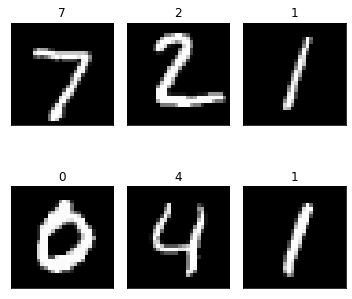

(28, 28, 1) (10,)


In [19]:
n_img = 6
plot_image(dataset_1.x_test[:n_img], dataset_1.y_test[:n_img], dataset_1.class_names, n_img)
print(dataset_1.x_test[0].shape, dataset_1.y_test[0].shape)

## 1.2. SMALLNORB

In [27]:
data_name_2 = 'SMALLNORB'
# dataset_2 = Dataset(data_name_2)

In [8]:
# n_img = 6
# plot_image(dataset_2.x_test[:n_img], dataset_2.y_test[:n_img], dataset_2.class_names, n_img)
# print(dataset_2.x_test[0].shape, dataset_2.y_test[0].shape)

## 1.3. CIFAR10

In [20]:
data_name_3 = 'CIFAR10'
dataset_3 = Dataset(data_name_3)

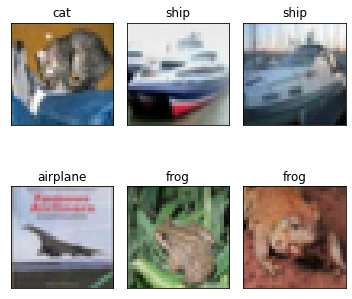

(32, 32, 3) (10,)


In [21]:
n_img = 6
plot_image(dataset_3.x_test[:n_img], dataset_3.y_test[:n_img], dataset_3.class_names, n_img)
print(dataset_3.x_test[0].shape, dataset_3.y_test[0].shape)

# 2. Load Model

In [29]:
# model_train = CapsNet(data_name_1, mode='train', r=3)
# model_train = CapsNet(data_name_2, mode='train', r=3)
model_train = CapsNet(data_name_3, mode='train', r=3)

Model: "Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 256)       62464     
_________________________________________________________________
primary_caps_4 (PrimaryCaps) (None, 8, 8, 64, 8)       10617856  
_________________________________________________________________
digit_caps_4 (DigitCaps)     (None, 10, 16)            5243040   
_________________________________________________________________
length_4 (Length)            (None, 10)                0         
Total params: 15,923,360
Trainable params: 15,923,360
Non-trainable params: 0
_________________________________________________________________
Model: "Decoder"
_________________________________________________________________
Layer (type)                 O

# 3. Train Model

In [10]:
# data_train, data_test = dataset_1.get_tf_data()
# history = model_train.train(dataset_1, initial_epoch=0)
# data_train, data_test = dataset_2.get_tf_data()
# history = model_train.train(dataset_2, initial_epoch=0)
data_train, data_test = dataset_3.get_tf_data()
history = model_train.train(dataset_3, initial_epoch=0)

Load /weights-71.h5 successful
Epoch 72/100
1200/1200 [==============================] - 136s 104ms/step - loss: 0.0035 - Encoder_loss: 1.4169e-05 - Decoder_loss: 0.0088 - Encoder_accuracy: 1.0000 - val_loss: 0.0096 - val_Encoder_loss: 0.0058 - val_Decoder_loss: 0.0097 - val_Encoder_accuracy: 0.9943

Epoch 00072: saving model to ./logs/capsnet_MNIST\weights-72.h5
Epoch 73/100
1200/1200 [==============================] - 123s 103ms/step - loss: 0.0035 - Encoder_loss: 1.4585e-05 - Decoder_loss: 0.0088 - Encoder_accuracy: 1.0000 - val_loss: 0.0096 - val_Encoder_loss: 0.0058 - val_Decoder_loss: 0.0097 - val_Encoder_accuracy: 0.9943

Epoch 00073: saving model to ./logs/capsnet_MNIST\weights-73.h5
Epoch 74/100
1200/1200 [==============================] - 122s 102ms/step - loss: 0.0034 - Encoder_loss: 1.3459e-05 - Decoder_loss: 0.0087 - Encoder_accuracy: 1.0000 - val_loss: 0.0096 - val_Encoder_loss: 0.0058 - val_Decoder_loss: 0.0097 - val_Encoder_accuracy: 0.9944

Epoch 00074: saving model to

In [11]:
# %load_ext tensorboard
# %tensorboard --logdir logs/capsnet_MNIST/log/validation